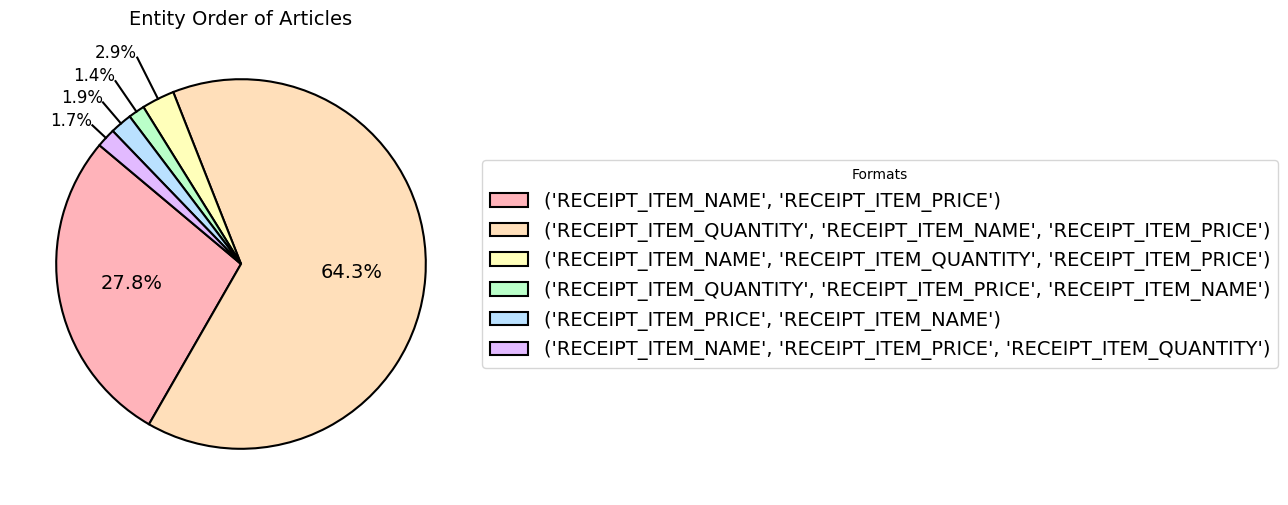

In [21]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for cos and sin

# Data
formats = [
    "('RECEIPT_ITEM_NAME', 'RECEIPT_ITEM_PRICE')",
    "('RECEIPT_ITEM_QUANTITY', 'RECEIPT_ITEM_NAME', 'RECEIPT_ITEM_PRICE')",
    "('RECEIPT_ITEM_NAME', 'RECEIPT_ITEM_QUANTITY', 'RECEIPT_ITEM_PRICE')",
    "('RECEIPT_ITEM_QUANTITY', 'RECEIPT_ITEM_PRICE', 'RECEIPT_ITEM_NAME')",
    "('RECEIPT_ITEM_PRICE', 'RECEIPT_ITEM_NAME')",
    "('RECEIPT_ITEM_NAME', 'RECEIPT_ITEM_PRICE', 'RECEIPT_ITEM_QUANTITY')"
]
counts = [116, 268, 12, 6, 8, 7]

# Define colors (shades of blue)
colors = [
    "#FFB3BA",  # Pastel pink
    "#FFDFBA",  # Pastel orange
    "#FFFFBA",  # Pastel yellow
    "#BAFFC9",  # Pastel green
    "#BAE1FF",  # Pastel blue
    "#E2BAFF"   # Pastel purple
]

# Create the pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,  # We'll move the labels to the legend
    autopct='%1.1f%%',  # Display percentages on the slices
    colors=colors,
    startangle=140,  # Start angle for better layout
    textprops={'fontsize': 14},  # Font size for percentages
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Black border around slices
)

# Hide the text for the smallest slice (3%) inside the chart and move the percentage outside
for i, autotext in enumerate(autotexts):
    # If it's the smallest slice, remove text inside and move it outside
    if autotext.get_text() == '2.9%':
        autotext.set_text('')  # Remove the percentage inside the slice
        
        # Move text outside the slice
        angle = (wedges[i].theta2 + wedges[i].theta1) / 2  # Get the middle angle of the slice
        x = 1.25 * wedges[i].r * np.cos(np.radians(angle))  # X position of the percentage text (slightly decreased distance)
        y = 1.25 * wedges[i].r * np.sin(np.radians(angle))  # Y position of the percentage text (slightly decreased distance)
        
        # Add the percentage outside the slice
        plt.text(x, y, f"2.9%", ha='right', fontsize=12)

        # Add a line pointing to the slice's center (not corner), shorter line
        line_x = [wedges[i].r * np.cos(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  x]  # X coordinates for the line
        line_y = [wedges[i].r * np.sin(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  y]  # Y coordinates for the line
        plt.plot(line_x, line_y, color='black', lw=1.5)  # Draw the line

# Hide the text for the smallest slice (3%) inside the chart and move the percentage outside
for i, autotext in enumerate(autotexts):
    # If it's the smallest slice, remove text inside and move it outside
    if autotext.get_text() == '1.4%':
        autotext.set_text('')  # Remove the percentage inside the slice
        
        # Move text outside the slice
        angle = (wedges[i].theta2 + wedges[i].theta1) / 2  # Get the middle angle of the slice
        x = 1.2 * wedges[i].r * np.cos(np.radians(angle))  # X position of the percentage text (slightly decreased distance)
        y = 1.2 * wedges[i].r * np.sin(np.radians(angle))  # Y position of the percentage text (slightly decreased distance)
        
        # Add the percentage outside the slice
        plt.text(x, y, f"1.4%", ha='right', fontsize=12)

        # Add a line pointing to the slice's center (not corner), shorter line
        line_x = [wedges[i].r * np.cos(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  x]  # X coordinates for the line
        line_y = [wedges[i].r * np.sin(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  y]  # Y coordinates for the line
        plt.plot(line_x, line_y, color='black', lw=1.5)  # Draw the line
    
# Hide the text for the smallest slice (3%) inside the chart and move the percentage outside
for i, autotext in enumerate(autotexts):
    # If it's the smallest slice, remove text inside and move it outside
    if autotext.get_text() == '1.9%':
        autotext.set_text('')  # Remove the percentage inside the slice
        
        # Move text outside the slice
        angle = (wedges[i].theta2 + wedges[i].theta1) / 2  # Get the middle angle of the slice
        x = 1.15 * wedges[i].r * np.cos(np.radians(angle))  # X position of the percentage text (slightly decreased distance)
        y = 1.15 * wedges[i].r * np.sin(np.radians(angle))  # Y position of the percentage text (slightly decreased distance)
        
        # Add the percentage outside the slice
        plt.text(x, y, f"1.9%", ha='right', fontsize=12)

        # Add a line pointing to the slice's center (not corner), shorter line
        line_x = [wedges[i].r * np.cos(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  x]  # X coordinates for the line
        line_y = [wedges[i].r * np.sin(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  y]  # Y coordinates for the line
        plt.plot(line_x, line_y, color='black', lw=1.5)  # Draw the line

# Hide the text for the smallest slice (3%) inside the chart and move the percentage outside
for i, autotext in enumerate(autotexts):
    # If it's the smallest slice, remove text inside and move it outside
    if autotext.get_text() == '1.7%':
        autotext.set_text('')  # Remove the percentage inside the slice
        
        # Move text outside the slice
        angle = (wedges[i].theta2 + wedges[i].theta1) / 2  # Get the middle angle of the slice
        x = 1.1 * wedges[i].r * np.cos(np.radians(angle))  # X position of the percentage text (slightly decreased distance)
        y = 1.1 * wedges[i].r * np.sin(np.radians(angle))  # Y position of the percentage text (slightly decreased distance)
        
        # Add the percentage outside the slice
        plt.text(x, y, f"1.7%", ha='right', fontsize=12)

        # Add a line pointing to the slice's center (not corner), shorter line
        line_x = [wedges[i].r * np.cos(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  x]  # X coordinates for the line
        line_y = [wedges[i].r * np.sin(np.radians((wedges[i].theta1 + wedges[i].theta2) / 2)),
                  y]  # Y coordinates for the line
        plt.plot(line_x, line_y, color='black', lw=1.5)  # Draw the line

# Add a title
plt.title('Entity Order of Articles', fontsize=14)

# Add a legend
plt.legend(
    wedges,
    formats,
    title="Formats",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Position legend to the right
    fontsize=14
)

# Save the plot
plt.savefig('entity_order_distribution_piechart.png', dpi=300, bbox_inches='tight')  # Save with high resolution

# Show the plot
plt.show()